In [ ]:
from typing_extensions import  TypedDict,
from langgraph.graph import StateGraph , START, END
from langchain_groq import ChatGroq
from dotenv import load_dotenv


In [2]:
load_dotenv()

True

In [3]:
class SubState(TypedDict):
  input_text: str
  translated_text : str

In [5]:
subgraph_llm = ChatGroq(model = "llama-3.1-8b-instant")

In [6]:
def translate_text(state: SubState):
  prompt = f"""Translate the following text to Hindi.
  Keep it natural and clear. Do not add extra content.
  
  Text:{state['input_text']}
  """.strip()
  translated_text = subgraph_llm.invoke(prompt).content
  return {"translated_text": translated_text}

In [7]:
subgraph_builder = StateGraph(SubState)

subgraph_builder.add_node("translate_text", translate_text)
subgraph_builder.add_edge(START , 'translate_text')
subgraph_builder.add_edge('translate_text', END)

subgraph = subgraph_builder.compile()


In [8]:
class ParentState(TypedDict):
  question : str
  answer_eng: str
  answer_hin :str
  

In [18]:
parent_llm = ChatGroq(model = 'llama-3.1-8b-instant')


In [22]:
def generate_answer(state: ParentState):
  answer = parent_llm.invoke(f"You are a helpful assistant. Answer clearly in paragraph or bullet points. \nQuestion: {state['question']}").content
  return {'answer_eng': answer}

In [13]:
def translate_answer(state: ParentState):\
  #call subgraph
  
  result = subgraph.invoke({'input_text': state['answer_eng']})
  return {'answer_hin' : result['translated_text']}


In [14]:
parent_builder = StateGraph(ParentState)
parent_builder.add_node('answer', generate_answer)

parent_builder.add_node('translate', translate_answer)
parent_builder.add_edge(START, 'answer')
parent_builder.add_edge('answer', 'translate')
parent_builder.add_edge('translate', END)

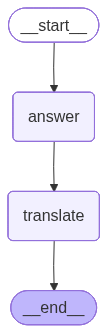

In [15]:
graph = parent_builder.compile()
graph

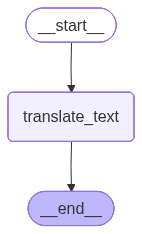

In [16]:
subgraph

In [25]:
result = graph.invoke({'question': 'What is Quantum Physics'})
print(result['answer_eng'])
print(result['answer_hin'])

Quantum physics is a branch of physics that studies the behavior of matter and energy at an atomic and subatomic level. At these scales, the classical laws of physics no longer apply, and strange, seemingly random phenomena govern the behavior of particles.

In quantum physics, particles can exist in multiple states simultaneously, known as superposition. They can also be connected across vast distances, instantaneously affecting each other, a phenomenon known as entanglement. This means that if something happens to one particle, it instantly affects the other particle, regardless of the distance between them.

Quantum physics also introduces the concept of wave-particle duality, where particles, such as electrons, can exhibit both wave-like and particle-like behavior depending on how they are observed. This challenges our classical understanding of particles as distinct, localized objects.

Some key principles of quantum physics include:

1. **Wave-particle duality**: particles can ex